In [2]:
pip install EMD-signal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires dill<0.3.9,>=0.3.0, but you have dill 0.4.0 which is incompatible.
datasets 4.0.

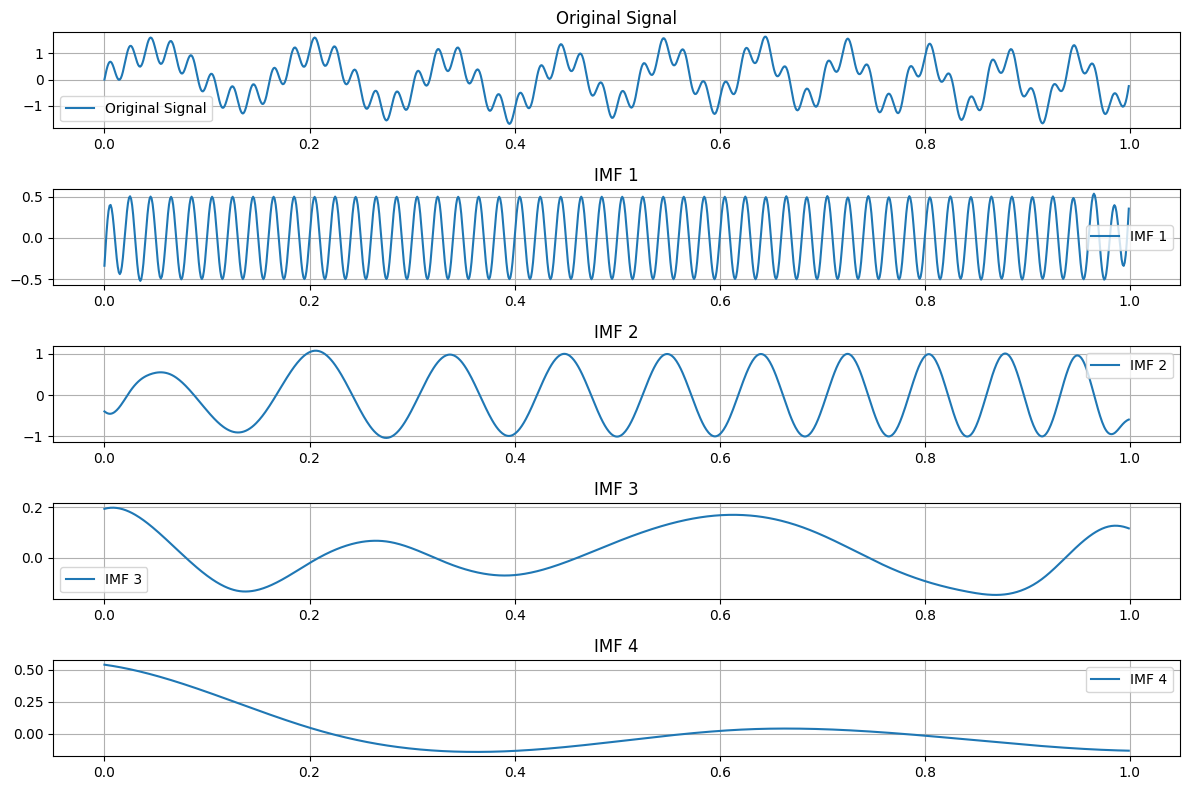

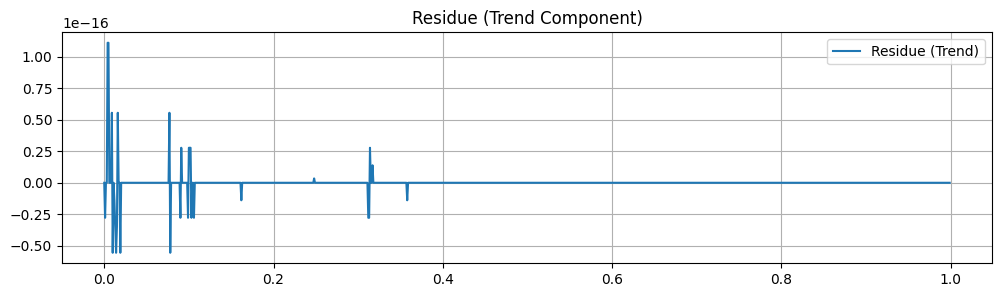

In [3]:
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt

# Generate a sample signal (e.g., a sum of sinusoids with varying frequencies)
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)
# Signal 1: A sine wave with changing frequency
s1 = np.sin(2 * np.pi * (5 * t + 5 * t**2))
# Signal 2: A higher frequency sine wave
s2 = 0.5 * np.sin(2 * np.pi * 50 * t)
# Signal 3: A low-frequency trend
s3 = 0.2 * np.sin(2 * np.pi * 2 * t)
# Combine signals
signal = s1 + s2 + s3

# Initialize EMD
emd = EMD()

# Perform EMD on the signal
# The emd() method decomposes the signal into Intrinsic Mode Functions (IMFs) and a residual
IMFs = emd.emd(signal)

# The result 'IMFs' is a numpy array where each row represents an IMF.
# The last component is the residue.

# Plot the original signal and its IMFs
plt.figure(figsize=(12, 8))

plt.subplot(len(IMFs) + 1, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.legend()
plt.grid(True)

for i, imf in enumerate(IMFs):
    plt.subplot(len(IMFs) + 1, 1, i + 2)
    plt.plot(t, imf, label=f'IMF {i+1}')
    plt.title(f'IMF {i+1}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# You can also access the residue (trend component)
# residue = emd.get_residue() # This method might be available in some versions or if you access it differently.
# A common way to get it is by subtracting the sum of IMFs from the original signal
reconstructed_signal = np.sum(IMFs, axis=0)
residue = signal - reconstructed_signal

plt.figure(figsize=(12, 3))
plt.plot(t, residue, label='Residue (Trend)')
plt.title('Residue (Trend Component)')
plt.legend()
plt.grid(True)
plt.show()